<a href="https://colab.research.google.com/github/CakeNuthep/WebScrapCondo/blob/main/webScrapingCondo_Buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.parse

%matplotlib inline

In [95]:
pd.set_option('display.max_colwidth', None)

In [191]:
# livinginsider's homepage
list_livinginsider_url = ['https://www.livinginsider.com/living_project/14/1136/Condo/Buysell/all/1/%E0%B9%84%E0%B8%AD-%E0%B9%80%E0%B8%AE%E0%B8%B2%E0%B8%AA%E0%B9%8C-%E0%B8%9E%E0%B8%A3%E0%B8%B0%E0%B8%A3%E0%B8%B2%E0%B8%A1-9-%E0%B9%80%E0%B8%AD%E0%B8%81%E0%B8%A1%E0%B8%B1%E0%B8%A2.html']


In [192]:
def cleanCost(text):
  new_str = text.replace('฿', '')
  new_str = new_str.replace('/ด.','')
  new_str = new_str.replace(',','')
  return new_str.strip()

def cleanSize(text):
  new_str = text.replace('ตร.ม.', '')
  return new_str.strip()

def cleanFloor(text):
  new_str = text.replace('ชั้นที่', '')
  return new_str.strip()

def cleanbed(text):
  new_str = text.replace('ห้องนอน', '')
  return new_str.strip()

def cleanbath(text):
  new_str = text.replace('ห้องน้ำ', '')
  return new_str.strip()

In [193]:
def scrabData(livinginsider_soup):
  lst = []
  for condo in livinginsider_soup.find_all('div', {'class': 'istock-list'}):
    # print(condo)
    item = condo.find('div', {'class': 'item-img'})
    condo_result = {}
    if(item):
      listing_cost = item.find('div', {'class': 'listing-cost'}).find('div').text
      listing_cost = cleanCost(listing_cost)
      a_tag = item.find('a')
      url = a_tag.get("href")
      url = urllib.parse.unquote(url)
      condo_result['URL']=url
      condo_result['COST']=listing_cost
      print(url)
      print(listing_cost)

    desc = condo.find('div', {'class': 'item-desc'})
    if(desc):
      title = desc.find('a').find('p').text.strip()


      listing_desc = desc.find_all('div', {'class': 'ic-detail'})
      size = listing_desc[0].text.strip()
      size = cleanSize(size)

      floor = listing_desc[1].text.strip()
      floor = cleanFloor(floor)

      bed = listing_desc[2].text.strip()
      bed = cleanbed(bed)

      bath = listing_desc[3].text.strip()
      bath = cleanbath(bath)

      condo_result['TITLE']=title
      condo_result['SIZE']=size
      condo_result['FLOOR']=floor
      condo_result['BED']=bed
      condo_result['BATH']=bath
      print(f"{title} {size} {floor} {bed} {bath}")
      s = pd.Series(data=condo_result, index=['TITLE','URL', 'COST', 'SIZE','FLOOR','BED','BATH'])
      lst.append(s)
  return lst



In [194]:
allPage = []
for livinginsider_url in list_livinginsider_url:
  # Use requests to retrieve data from a given URL
  livinginsider_response = requests.get(livinginsider_url, headers={'User-Agent': 'Mozilla/5.0'})

  # Parse the whole HTML page using BeautifulSoup
  livinginsider_soup = BeautifulSoup(livinginsider_response.text, 'html.parser')

  lst = scrabData(livinginsider_soup)
  allPage = allPage + lst


https://www.livinginsider.com/livingdetail/1463276/ขายคอนโดอยู่ติดสถานีรถไฟฟ้าMRT-0เมตร-IHOUSE-พระราม9-เอกมัย-ติดทางลงรถไฟฟ้าสายสีส้มMRT-0เมตร-ตกแต่งหร.html
1600000
ขายคอนโดอยู่ติดสถานีรถไฟฟ้าMRT 0เมตร IHOUSE พระราม9-เอกมัย ติดทางลงรถไฟฟ้าสายสีส้มMRT 0เมตร ตกแต่งหรู ตามรูป 29 4 ห้องสตูดิโอ 1
https://www.livinginsider.com/livingdetail/1772452/รหัส-S3656-ขายคอนโด-ไอ-เฮาส์-พระราม9-เอกมัย-ราคา-1-6-ล้านบาท-ใกล้รถไฟฟ้า-MRT-พระราม9-The-Street.html
1600000
(รหัส S3656 ) ขายคอนโด ไอ-เฮาส์ พระราม9-เอกมัย ราคา 1.6 ล้านบาท ใกล้รถไฟฟ้า MRT พระราม9, The Street, Big C, Esplanade, Central พระราม9 เดินทางสะดวก ใกล้แหล่งช้อปปิ้ง 28 4 1 1
https://www.livinginsider.com/livingdetail/1799429/คอนโด-พระราม9-เงียบสงบ-ชั้น8-วิวส่วนตัว-MRTอยู่หน้าคอนโด-ห่าง-0เมตร.html
3990000
คอนโด พระราม9 เงียบสงบ ชั้น8 วิวส่วนตัว MRTอยู่หน้าคอนโด ห่าง 0เมตร 55 5-10 2 2
https://www.livinginsider.com/livingdetail/579022/ขายคอนโดอยู่ติดทางลงรถไฟฟ้าMRT-0เมตร-IHOUSE-พระราม9-เอกมัย-ทางลงMRTอยู่ติดหน้าโครงการพอดี-ตกแต่งหรู.html
16500

In [195]:
data = pd.concat(allPage, axis=1).T

In [196]:
data

,TITLE,URL,COST,SIZE,FLOOR,BED,BATH
0,ขายคอนโดอยู่ติดสถานีรถไฟฟ้าMRT 0เมตร IHOUSE พระราม9-เอกมัย ติดทางลงรถไฟฟ้าสายสีส้มMRT 0เมตร ตกแต่งหรู ตามรูป,https://www.livinginsider.com/livingdetail/1463276/ขายคอนโดอยู่ติดสถานีรถไฟฟ้าMRT-0เมตร-IHOUSE-พระราม9-เอกมัย-ติดทางลงรถไฟฟ้าสายสีส้มMRT-0เมตร-ตกแต่งหร.html,1600000,29,4,ห้องสตูดิโอ,1
1,"(รหัส S3656 ) ขายคอนโด ไอ-เฮาส์ พระราม9-เอกมัย ราคา 1.6 ล้านบาท ใกล้รถไฟฟ้า MRT พระราม9, The Street, Big C, Esplanade, Central พระราม9 เดินทางสะดวก ใกล้แหล่งช้อปปิ้ง",https://www.livinginsider.com/livingdetail/1772452/รหัส-S3656-ขายคอนโด-ไอ-เฮาส์-พระราม9-เอกมัย-ราคา-1-6-ล้านบาท-ใกล้รถไฟฟ้า-MRT-พระราม9-The-Street.html,1600000,28,4,1,1
2,คอนโด พระราม9 เงียบสงบ ชั้น8 วิวส่วนตัว MRTอยู่หน้าคอนโด ห่าง 0เมตร,https://www.livinginsider.com/livingdetail/1799429/คอนโด-พระราม9-เงียบสงบ-ชั้น8-วิวส่วนตัว-MRTอยู่หน้าคอนโด-ห่าง-0เมตร.html,3990000,55,5-10,2,2
3,ขายคอนโดอยู่ติดทางลงรถไฟฟ้าMRT 0เมตร IHOUSE พระราม9-เอกมัย ทางลงMRTอยู่ติดหน้าโครงการพอดี ตกแต่งหรู พร้อมเข้าอยู่ ห้องจริงตามรูปเลย,https://www.livinginsider.com/livingdetail/579022/ขายคอนโดอยู่ติดทางลงรถไฟฟ้าMRT-0เมตร-IHOUSE-พระราม9-เอกมัย-ทางลงMRTอยู่ติดหน้าโครงการพอดี-ตกแต่งหรู.html,1650000,29,5,ห้องสตูดิโอ,1
4,🔥 ห้องแต่งสวย ชั้น 1 ลดพิเศษ!! ขายคอนโด i-House พระราม 9 - เอกมัย,https://www.livinginsider.com/livingdetail/1091888/-ห้องแต่งสวย-ชั้น-1-ลดพิเศษ-ขายคอนโด-i-House-พระราม-9-เอกมัย.html,1590000,28,1-4,1,1
5,🔥 ขายด่วน!! ห้องชั้น 2 มีเฟอร์ ขายคอนโด i-House พระราม 9 - เอกมัย ใกล้รถไฟฟ้า MRT,https://www.livinginsider.com/livingdetail/1091891/-ขายด่วน-ห้องชั้น-2-มีเฟอร์-ขายคอนโด-i-House-พระราม-9-เอกมัย-ใกล้รถไฟฟ้า-MRT.html,1540000,28,2,1,1


In [197]:
data['COST'] = data['COST'].astype('float')
data['SIZE'] = data['SIZE'].astype('float')

In [198]:
data['SIZE Per M2'] = data['COST']/data['SIZE']

In [199]:
data['ESTIMATE Rent'] = data['COST']/150

In [200]:
data[['COST','SIZE','FLOOR','ESTIMATE Rent','SIZE Per M2']].sort_values(by=['SIZE Per M2'])

,COST,SIZE,FLOOR,ESTIMATE Rent,SIZE Per M2
5,1540000.0,28.0,2,10266.666667,55000.000000
0,1600000.0,29.0,4,10666.666667,55172.413793
4,1590000.0,28.0,1-4,10600.000000,56785.714286
3,1650000.0,29.0,5,11000.000000,56896.551724
1,1600000.0,28.0,4,10666.666667,57142.857143
2,3990000.0,55.0,5-10,26600.000000,72545.454545


In [201]:
data[['COST','SIZE','FLOOR','ESTIMATE Rent']].sort_values(by=['ESTIMATE Rent'])

,COST,SIZE,FLOOR,ESTIMATE Rent
5,1540000.0,28.0,2,10266.666667
4,1590000.0,28.0,1-4,10600.000000
0,1600000.0,29.0,4,10666.666667
1,1600000.0,28.0,4,10666.666667
3,1650000.0,29.0,5,11000.000000
2,3990000.0,55.0,5-10,26600.000000


In [202]:
print(f"cost max: {data['COST'].max()}, cost min: {data['COST'].min()}, cost mean: {data['COST'].mean()}")

cost max: 3990000.0, cost min: 1540000.0, cost mean: 1995000.0


In [203]:
print(f"ESTIMATE Rent max: {data['ESTIMATE Rent'].max()}, ESTIMATE Rent min: {data['ESTIMATE Rent'].min()}, ESTIMATE Rent mean: {data['ESTIMATE Rent'].mean()}")

ESTIMATE Rent max: 26600.0, ESTIMATE Rent min: 10266.666666666666, ESTIMATE Rent mean: 13300.0


<Axes: ylabel='Frequency'>

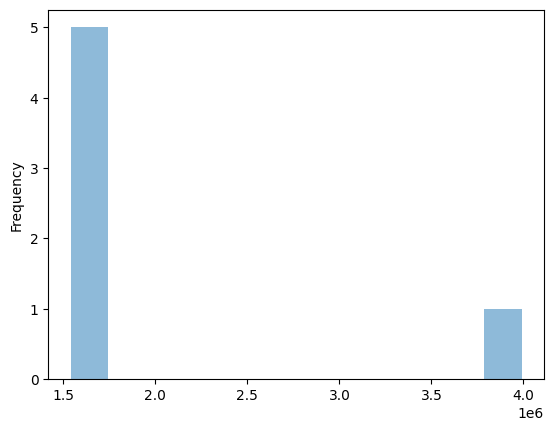

In [204]:
data['COST'].plot.hist(bins=12,alpha=0.5)

<Axes: ylabel='Frequency'>

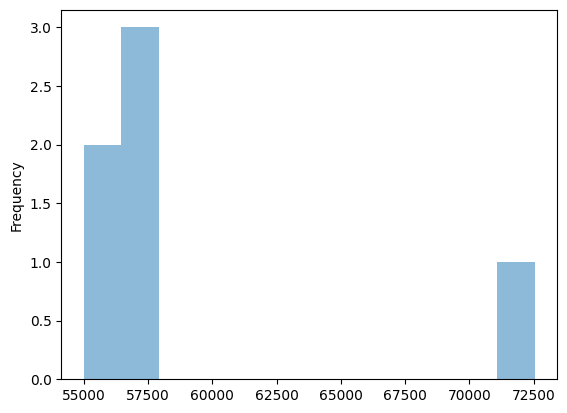

In [205]:
data['SIZE Per M2'].plot.hist(bins=12,alpha=0.5)

<Axes: ylabel='Frequency'>

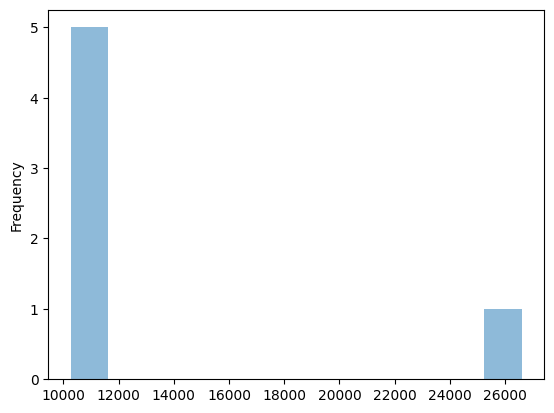

In [206]:
data['ESTIMATE Rent'].plot.hist(bins=12,alpha=0.5)

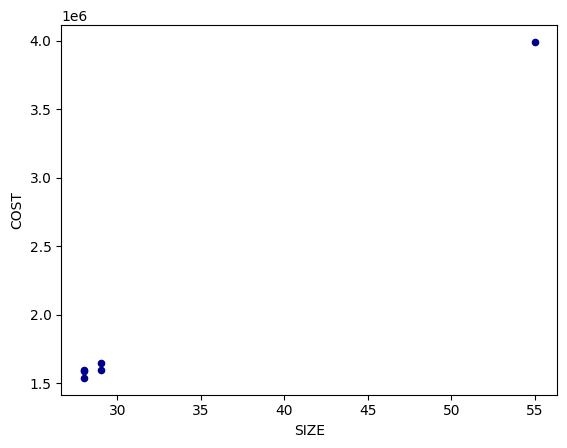

In [207]:
ax1 = data.plot.scatter(x='SIZE',
                      y='COST',
                      c='DarkBlue')

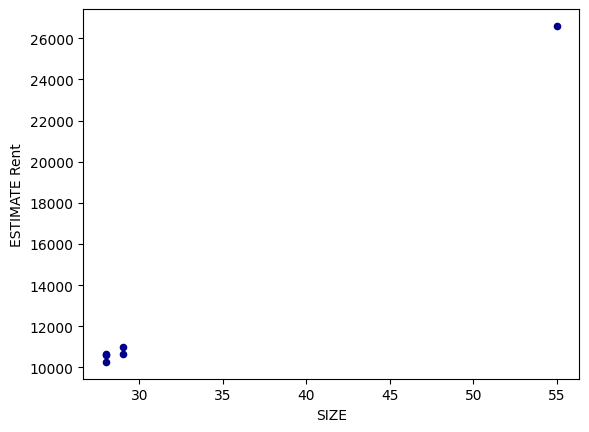

In [208]:
ax1 = data.plot.scatter(x='SIZE',
                      y='ESTIMATE Rent',
                      c='DarkBlue')

# Calculate Yield

In [221]:
rent = 9000

In [222]:
data['Yield'] = rent*12/data['COST']

In [224]:
data.sort_values(by=['Yield'], ascending=False)

,TITLE,URL,COST,SIZE,FLOOR,BED,BATH,SIZE Per M2,ESTIMATE Rent,Yield
5,🔥 ขายด่วน!! ห้องชั้น 2 มีเฟอร์ ขายคอนโด i-House พระราม 9 - เอกมัย ใกล้รถไฟฟ้า MRT,https://www.livinginsider.com/livingdetail/1091891/-ขายด่วน-ห้องชั้น-2-มีเฟอร์-ขายคอนโด-i-House-พระราม-9-เอกมัย-ใกล้รถไฟฟ้า-MRT.html,1540000.0,28.0,2,1,1,55000.000000,10266.666667,0.070130
4,🔥 ห้องแต่งสวย ชั้น 1 ลดพิเศษ!! ขายคอนโด i-House พระราม 9 - เอกมัย,https://www.livinginsider.com/livingdetail/1091888/-ห้องแต่งสวย-ชั้น-1-ลดพิเศษ-ขายคอนโด-i-House-พระราม-9-เอกมัย.html,1590000.0,28.0,1-4,1,1,56785.714286,10600.000000,0.067925
0,ขายคอนโดอยู่ติดสถานีรถไฟฟ้าMRT 0เมตร IHOUSE พระราม9-เอกมัย ติดทางลงรถไฟฟ้าสายสีส้มMRT 0เมตร ตกแต่งหรู ตามรูป,https://www.livinginsider.com/livingdetail/1463276/ขายคอนโดอยู่ติดสถานีรถไฟฟ้าMRT-0เมตร-IHOUSE-พระราม9-เอกมัย-ติดทางลงรถไฟฟ้าสายสีส้มMRT-0เมตร-ตกแต่งหร.html,1600000.0,29.0,4,ห้องสตูดิโอ,1,55172.413793,10666.666667,0.067500
1,"(รหัส S3656 ) ขายคอนโด ไอ-เฮาส์ พระราม9-เอกมัย ราคา 1.6 ล้านบาท ใกล้รถไฟฟ้า MRT พระราม9, The Street, Big C, Esplanade, Central พระราม9 เดินทางสะดวก ใกล้แหล่งช้อปปิ้ง",https://www.livinginsider.com/livingdetail/1772452/รหัส-S3656-ขายคอนโด-ไอ-เฮาส์-พระราม9-เอกมัย-ราคา-1-6-ล้านบาท-ใกล้รถไฟฟ้า-MRT-พระราม9-The-Street.html,1600000.0,28.0,4,1,1,57142.857143,10666.666667,0.067500
3,ขายคอนโดอยู่ติดทางลงรถไฟฟ้าMRT 0เมตร IHOUSE พระราม9-เอกมัย ทางลงMRTอยู่ติดหน้าโครงการพอดี ตกแต่งหรู พร้อมเข้าอยู่ ห้องจริงตามรูปเลย,https://www.livinginsider.com/livingdetail/579022/ขายคอนโดอยู่ติดทางลงรถไฟฟ้าMRT-0เมตร-IHOUSE-พระราม9-เอกมัย-ทางลงMRTอยู่ติดหน้าโครงการพอดี-ตกแต่งหรู.html,1650000.0,29.0,5,ห้องสตูดิโอ,1,56896.551724,11000.000000,0.065455
2,คอนโด พระราม9 เงียบสงบ ชั้น8 วิวส่วนตัว MRTอยู่หน้าคอนโด ห่าง 0เมตร,https://www.livinginsider.com/livingdetail/1799429/คอนโด-พระราม9-เงียบสงบ-ชั้น8-วิวส่วนตัว-MRTอยู่หน้าคอนโด-ห่าง-0เมตร.html,3990000.0,55.0,5-10,2,2,72545.454545,26600.000000,0.027068
